In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

pprint(cities)

['illoqqortoormiut',
 'cabo san lucas',
 'hami',
 'new norfolk',
 'hervey bay',
 'hambantota',
 'kirakira',
 'smithers',
 'mataura',
 'provideniya',
 'taolanaro',
 'awjilah',
 'cape town',
 'marsa matruh',
 'qaanaaq',
 'hermanus',
 'christchurch',
 'mahebourg',
 'ngukurr',
 'cairns',
 'cilegon',
 'barentsburg',
 'hilo',
 'sambava',
 'yellowknife',
 'apple valley',
 'atuona',
 'cherskiy',
 'amderma',
 'camacha',
 'balangiga',
 'wanning',
 'busselton',
 'cody',
 'liverpool',
 'arraial do cabo',
 'karratha',
 'ribeira grande',
 'ossora',
 'rio gallegos',
 'constitucion',
 'jamestown',
 'castro',
 'rorvik',
 'punta arenas',
 'torbay',
 'fortuna',
 'tuktoyaktuk',
 'ushuaia',
 'port elizabeth',
 'attawapiskat',
 'baruun-urt',
 'clyde river',
 'leh',
 'seondha',
 'vestmannaeyjar',
 'doha',
 'gazalkent',
 'sangar',
 'khatanga',
 'cravo norte',
 'albany',
 'alekseyevka',
 'nanortalik',
 'manado',
 'kaitangata',
 'yankton',
 'sola',
 'hithadhoo',
 'miyako',
 'haines junction',
 'nyurba',
 'murot

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Make empty dictionary to store all values

dictionary = {
    'temperature' : [],
     'humidity' : [],
     'cloudiness %' : [],
     'windspeed (mph)' : [],
     'latitude': []
     }

city_nums = [x for x in range(1,len(cities))]

# print(city_nums)

for city, num in zip(cities,city_nums):
    try:
        city_url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&q={city}{api_key}" 
        request = requests.get(city_url).json()
        dictionary['temperature'].append(request['main']['temp'])
        dictionary['humidity'].append(request['main']['humidity'])
        dictionary['cloudiness %'].append(request['clouds']['all'])
        dictionary['windspeed (mph)'].append(request['wind']['speed'])
        dictionary['latitude'].append(request['coord']['lat'])
        print("--------------------------------------------")
        print(f"API Call #{num}: Adding {city.title()}'s information to the dataframe... ")
    except KeyError:
        print("--------------------------------------------")
        print(f"API Call #{num}: {city.title()} not in database.")
        


--------------------------------------------
API Call #1: Illoqqortoormiut not in database
--------------------------------------------
API Call #2: Adding Cabo San Lucas's information to the dataframe... 
--------------------------------------------
API Call #3: Adding Hami's information to the dataframe... 
--------------------------------------------
API Call #4: Adding New Norfolk's information to the dataframe... 
--------------------------------------------
API Call #5: Adding Hervey Bay's information to the dataframe... 
--------------------------------------------
API Call #6: Adding Hambantota's information to the dataframe... 
--------------------------------------------
API Call #7: Adding Kirakira's information to the dataframe... 
--------------------------------------------
API Call #8: Adding Smithers's information to the dataframe... 
--------------------------------------------
API Call #9: Adding Mataura's information to the dataframe... 
-----------------------------

--------------------------------------------
API Call #77: Adding Bluff's information to the dataframe... 
--------------------------------------------
API Call #78: Adding Laguna's information to the dataframe... 
--------------------------------------------
API Call #79: Adding Pascagoula's information to the dataframe... 
--------------------------------------------
API Call #80: Adding Georgetown's information to the dataframe... 
--------------------------------------------
API Call #81: Adding Vila Franca Do Campo's information to the dataframe... 
--------------------------------------------
API Call #82: Adding Thompson's information to the dataframe... 
--------------------------------------------
API Call #83: Adding Coihaique's information to the dataframe... 
--------------------------------------------
API Call #84: Adding Olinda's information to the dataframe... 
--------------------------------------------
API Call #85: Adding Areosa's information to the dataframe... 
--

KeyboardInterrupt: 

In [ ]:
# Checks to see if the dictionary was built
print(dictionary)

In [ ]:
# Stores information as a dataframe

df = pd.DataFrame(dictionary)
df.head(20)


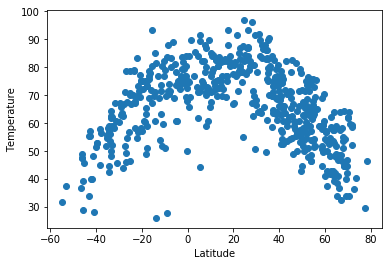

In [32]:
plt.scatter(df['latitude'], df['temperature'])
plt.xlabel('Latitude')
plt.ylabel('Temperature')

plt.show()

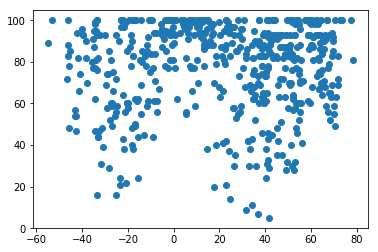

In [36]:
plt.scatter(df['latitude'], df['humidity'])
plt.show()

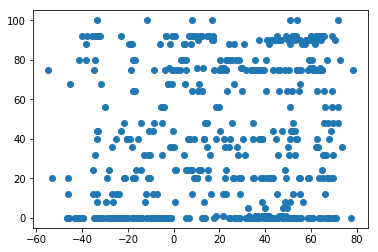

In [37]:
plt.scatter(df['latitude'], df['cloudiness %'])
plt.show()

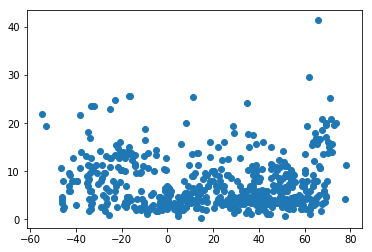

In [38]:
plt.scatter(df['latitude'], df['windspeed (mph)'])
plt.show()